<a href="https://colab.research.google.com/github/aleyna-cihangir/Seaborn_Library_Notes/blob/main/Seaborn_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sea


In [18]:
import seaborn as sns

In [19]:
planets = sns.load_dataset("planets")
planets.head() 

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [20]:
# We copy the dataset :
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [21]:
# object should be considered as its category :
df.info()
print("--"*20)
df.dtypes # it only helps us to find the information of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
----------------------------------------


method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [22]:
# Converting an Object data to Categorical :
import pandas as pd 
df.method = pd.Categorical(df.method)
df.dtypes # output : method will now appear as category 

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [23]:
df.shape # (1035, 6)
df.columns  # Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')
df.describe().T # .T : Take the Transpose
#describe : ignores missing observations and excludes categorical variables.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [24]:
# Is there any missing value, we observe it first : 
df.isnull().values.any() # True 

# How many missing values ​​in which variable :
df.isnull().sum() 

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [25]:
# If we want to assign average values ​​to the entire data set :
df.fillna(df.mean(), inplace= True)

# Now, because our data set is corrupted, we are redefining it : 
df = planets.copy()
df.head()
df.isnull().sum() 

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [26]:
df = planets.copy()
cat_df = df.select_dtypes(include="object")
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


**Categorical Variable**

In [27]:
# Access to the classes and the number of classes of the categorical variable : 

# Category total number of classes :
cat_df["method"].value_counts().count() 
cat_df.method.unique() 

# Access to the frequencies of the classes of the categorical variable :
cat_df["method"].value_counts() 

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

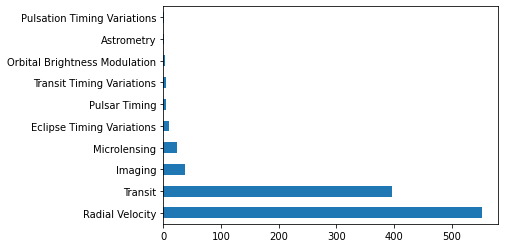

In [28]:
df["method"].value_counts().plot.barh();
# <matplotlib.axes._subplots.AxesSubplot at 0x7ff0e01ae0d0> If we want to close this information : ";"

**Continuous Variable**

In [29]:
df_num = df.select_dtypes(include=["float"])
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [31]:
# Well, can we perform this operation only on variables?
df["number"].describe().T

count    1035.000000
mean        1.785507
std         1.240976
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: number, dtype: float64

In [32]:
# If we are sum, we need to convert it to "str".
print("Average : " + str(df["number"].mean()))
print("Max Value : " + str(df["number"].max()))
print("Min Value  : " + str(df["number"].min()))
print("Median : " + str(df["number"].median()))
print("S. Deviation : " + str(df["number"].std()))
print("Full Number of Observations : " + str(df["number"].count()))

Average : 1.7855072463768116
Max Value : 7
Min Value  : 1
Median : 1.0
S. Deviation : 1.2409761743386767
Full Number of Observations : 1035


In [33]:
print("Average : " , df["number"].mean())
print("Max Value : " , df["number"].max())
print("Min Value  : " , df["number"].min())
print("Median : " , df["number"].median())
print("S. Deviation : " , df["number"].std())
print("Full Number of Observations : " , df["number"].count())

Average :  1.7855072463768116
Max Value :  7
Min Value  :  1
Median :  1.0
S. Deviation :  1.2409761743386767
Full Number of Observations :  1035



**Scatter Charts**
- **barplot :**

In [36]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [39]:
df["cut"].value_counts() 

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [40]:
df["color"].value_counts() 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [41]:
# ordinal identification
from pandas.api.types import CategoricalDtype

In [44]:
# ordered : It means transform the categorical variable in the specified dataframe.
df.cut = df.cut.astype(CategoricalDtype(ordered=True))

In [51]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [54]:
# how can I fix it?
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories=cut_categories, ordered=True))
df.cut.head(1)  # output is : 'Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal'

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

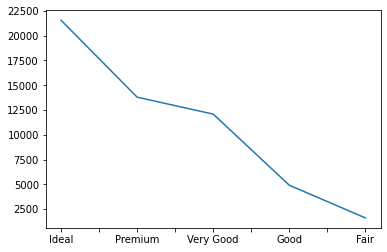

In [73]:
# Creating a bar chart:
df["cut"].value_counts().plot() 

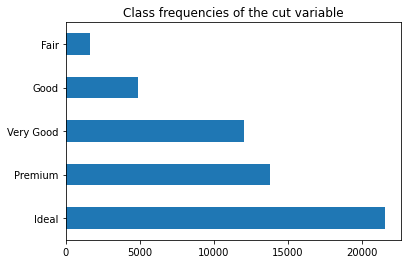

In [75]:
df["cut"].value_counts().plot.barh().set_title("Class frequencies of the cut variable") ;

In [ ]:
# we can write this code better : 
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Class frequencies of the cut variable")) ;
# Long written codes don't create a nice image

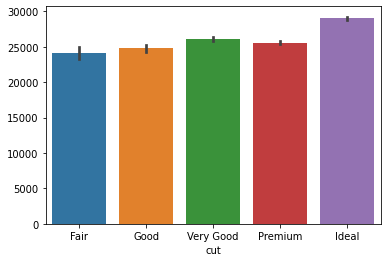

In [79]:
sns.barplot(x = "cut", y = df.cut.index, data= df);

**Column Chart Crosses**

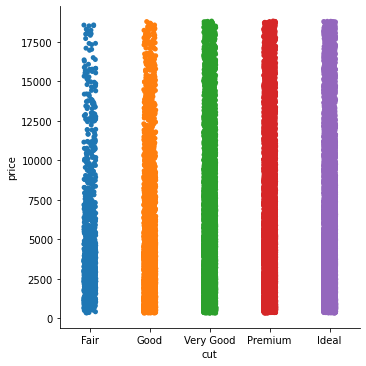

In [80]:
# We will cross the cut and price,
sns.catplot(x="cut", y="price", data =df);

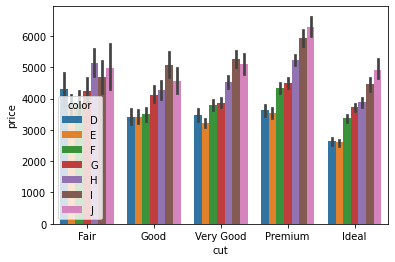

In [92]:
sns.barplot(x="cut", y="price",hue="color", data =df);

In [94]:
# When our price variable was 18000, it became 6000 after the transaction we made
# Because average processing was done in the background
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

**Creating a Histogram and Density Plot**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


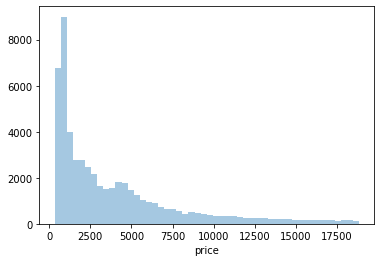

In [95]:
sns.distplot(df.price, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


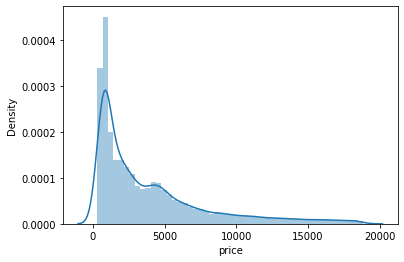

In [98]:
sns.distplot(df.price) # with density

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


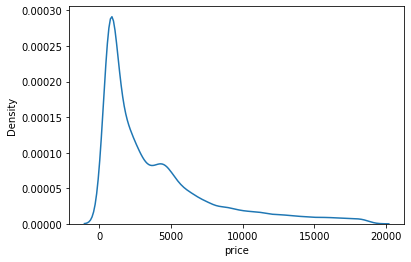

In [106]:
# If we just want to see the density chart
sns.distplot(df.price, hist= False);

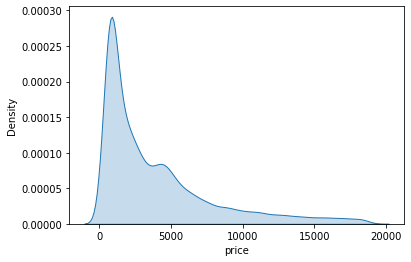

In [107]:
sns.kdeplot(df.price, shade=True);

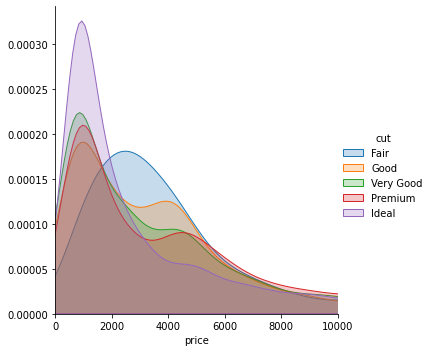

In [103]:
(sns
 .FacetGrid(df,
               hue= "cut",
               height= 5,
               xlim= (0,10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()); # refers to categorical data

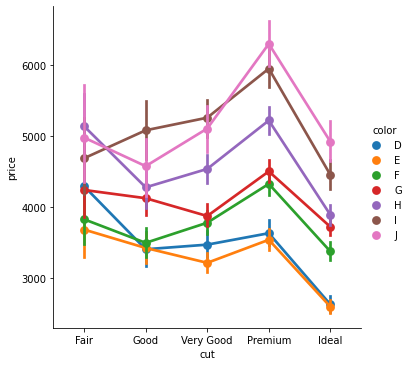

In [108]:
sns.catplot(x="cut", y="price", hue="color", kind= "point", data=df);

**Boxplot :**

In [110]:
tips = sns.load_dataset("tips")
df=tips.copy()
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [113]:
df["sex"].value_counts() 

Male      157
Female     87
Name: sex, dtype: int64

In [114]:
df["day"].value_counts() 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

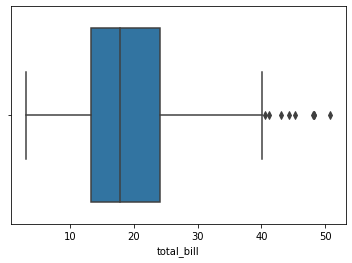

In [118]:
# creating a boxplot 
sns.boxplot(x= df["total_bill"]);

# from left to right ---->  min value, 25% value, median, 75% value, the value at the last point is max

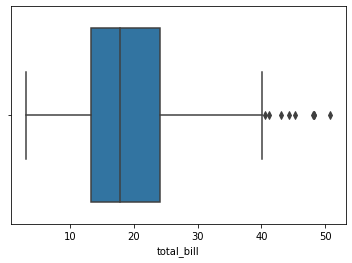

In [127]:
sns.boxplot(x= df["total_bill"], orient= "V"); # ITS NOT VERTICAL ANY WAY, WHY!!!

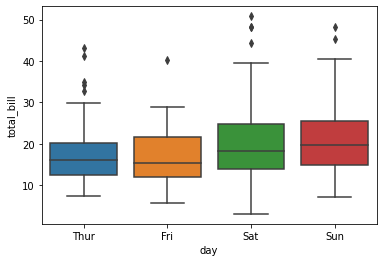

In [128]:
# which days earn much money we?
sns.boxplot(x="day", y="total_bill", data = df);

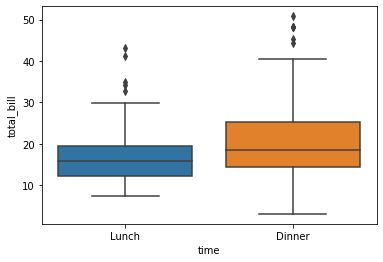

In [129]:
# do we earn money more in the morning or evening?
sns.boxplot(x="time", y="total_bill", data = df);

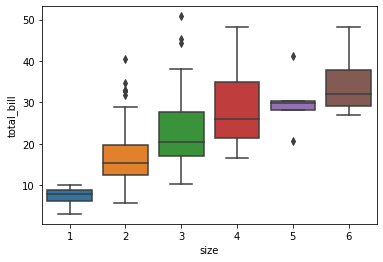

In [130]:
# number of person in this group affect the gain? 
sns.boxplot(x="size", y="total_bill", data = df);

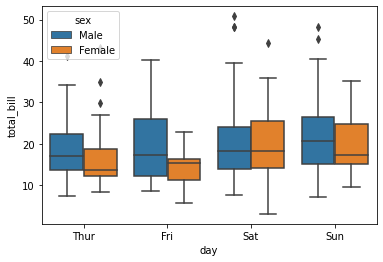

In [131]:
sns.boxplot(x="day", y="total_bill",hue="sex",  data = df);

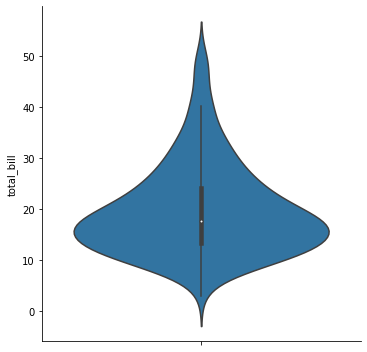

In [132]:
# creating the violin chart :
sns.catplot(y="total_bill", kind="violin", data=df);

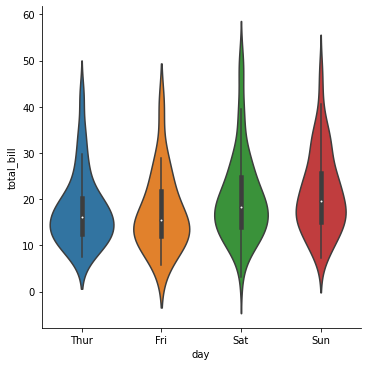

In [133]:
sns.catplot(x="day", y="total_bill",kind="violin",  data = df);

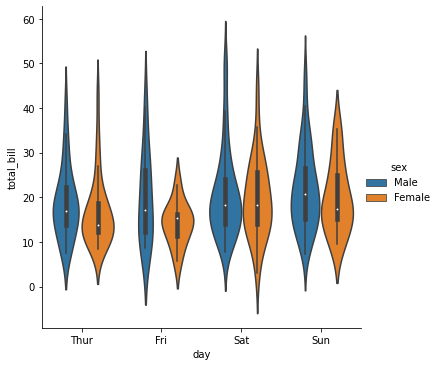

In [134]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin",  data = df);

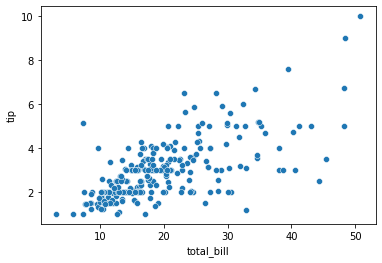

In [135]:
# creating a correlation graphs:
sns.scatterplot(x="total_bill", y="tip", data=df);

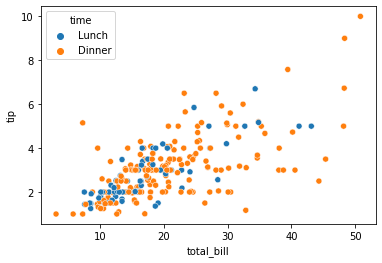

In [136]:
sns.scatterplot(x="total_bill", y="tip",hue="time", data=df);

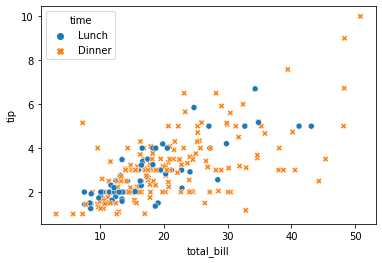

In [137]:
sns.scatterplot(x="total_bill", y="tip",hue="time",style="time",  data=df);

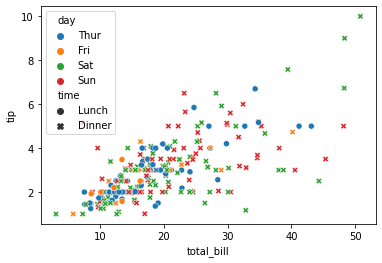

In [138]:
sns.scatterplot(x="total_bill", y="tip",hue="day",style="time",  data=df);  

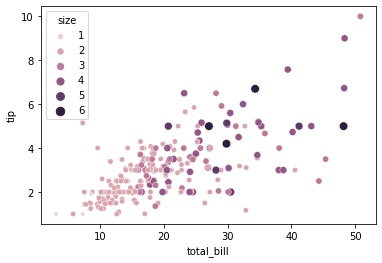

In [140]:
sns.scatterplot(x="total_bill", y="tip",hue= "size" ,size="size",  data=df);  

In [141]:
# showing of linear relationships
import matplotlib.pyplot as plt

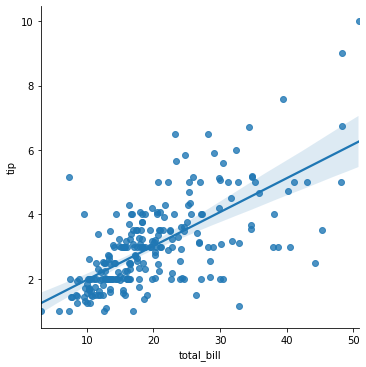

In [142]:
sns.lmplot(x="total_bill", y="tip", data=df);

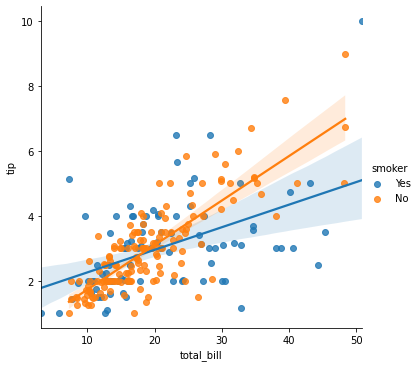

In [143]:
sns.lmplot(x="total_bill", y="tip",hue="smoker", data=df);

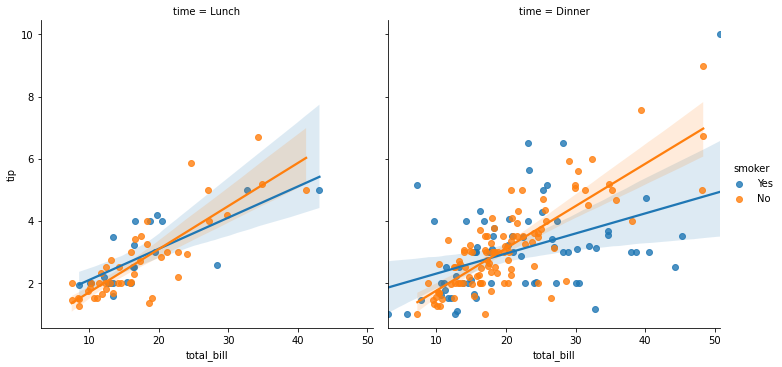

In [144]:
sns.lmplot(x="total_bill", y="tip",hue="smoker", col="time" , data=df);

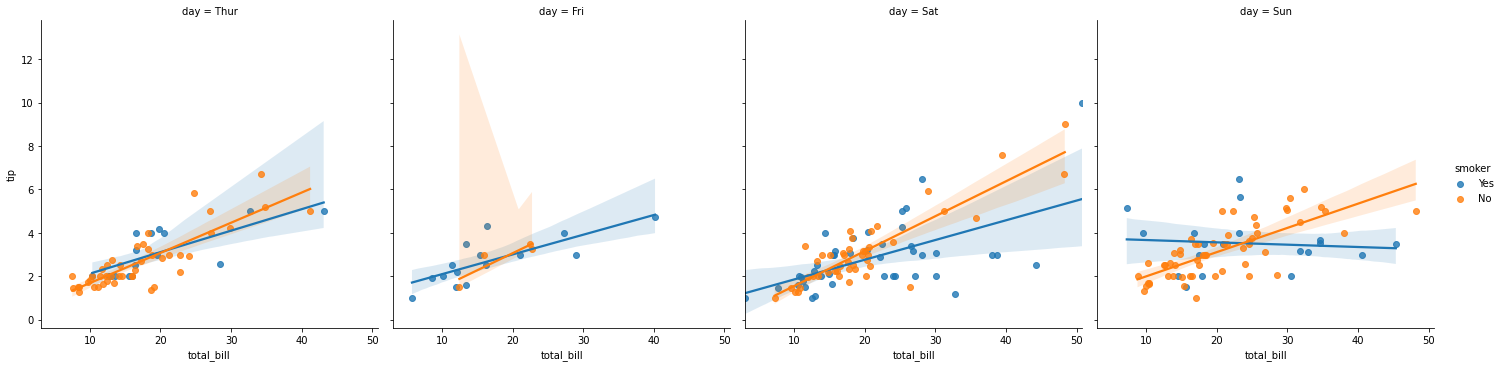

In [145]:
sns.lmplot(x="total_bill", y="tip",hue="smoker", col="day" , data=df);

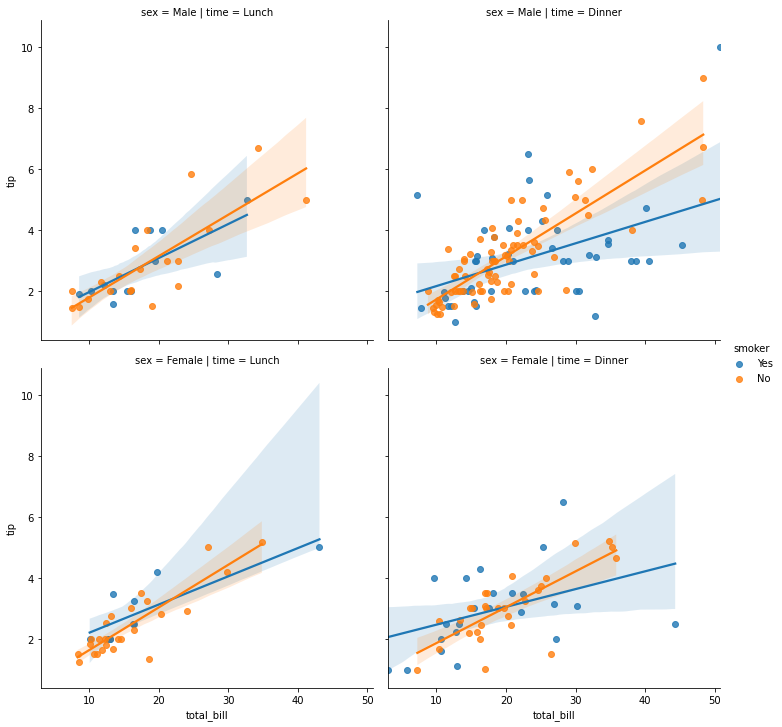

In [146]:
sns.lmplot(x="total_bill", y="tip",hue="smoker", col="time" , row="sex",  data=df);

In [147]:
# Scatter Plot Matrix :
iris = sns.load_dataset("iris")
df=iris.copy()
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [150]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

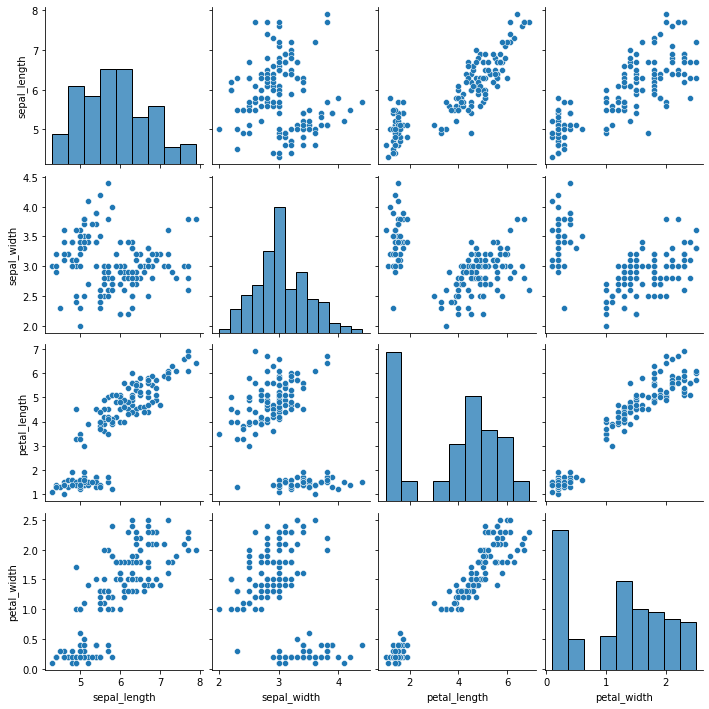

In [152]:
sns.pairplot(df); # relationship between to four variables in our dataset

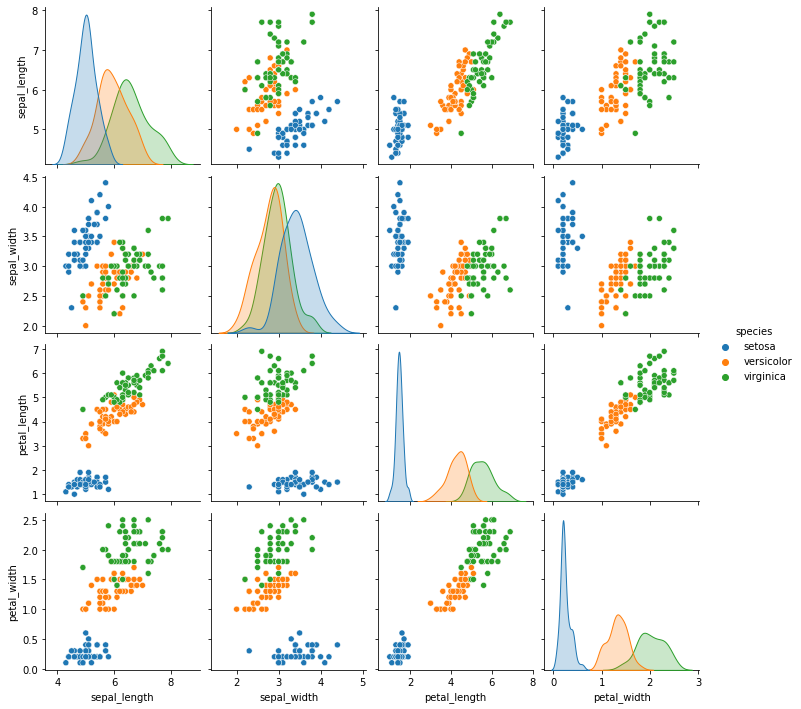

In [153]:
sns.pairplot(df, hue="species");

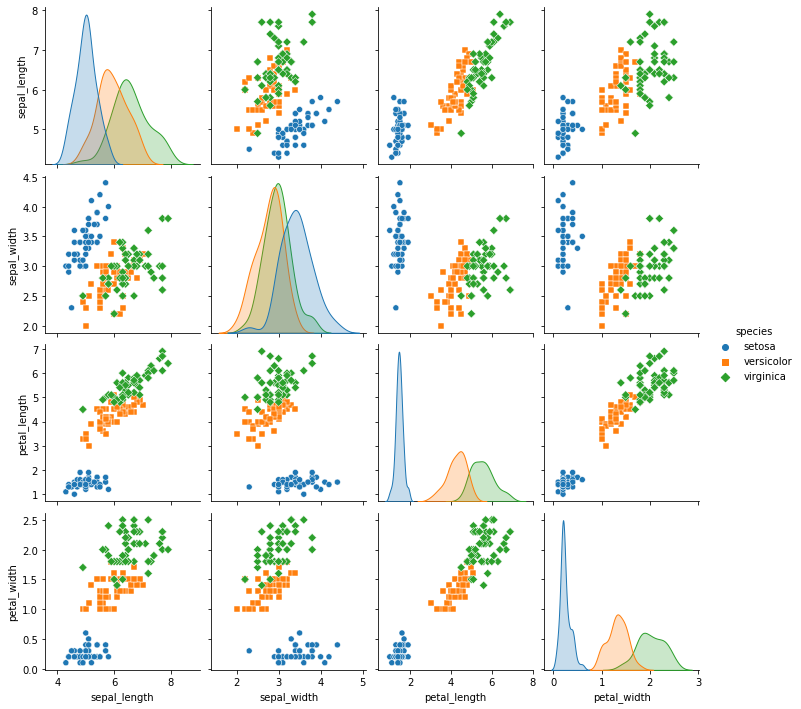

In [154]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"]);

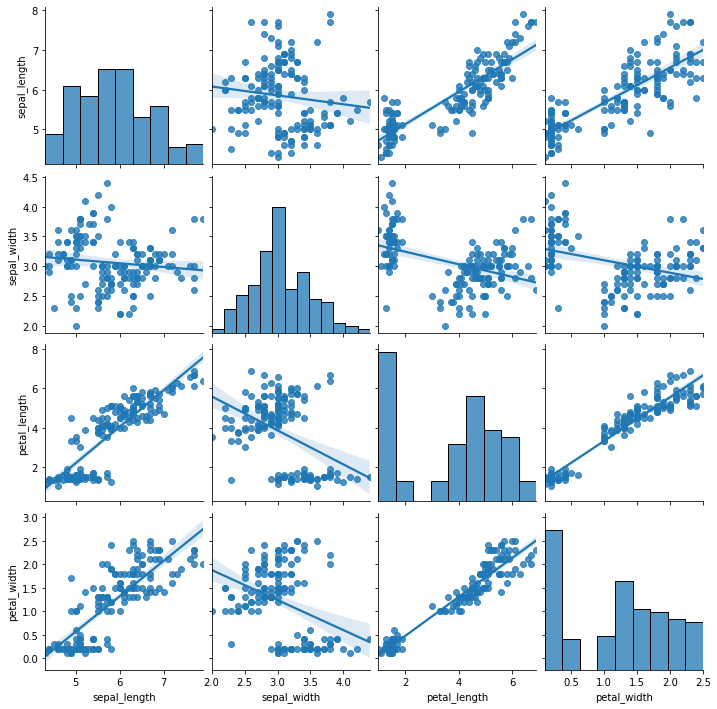

In [155]:
sns.pairplot(df, kind="reg"); # correct addition process

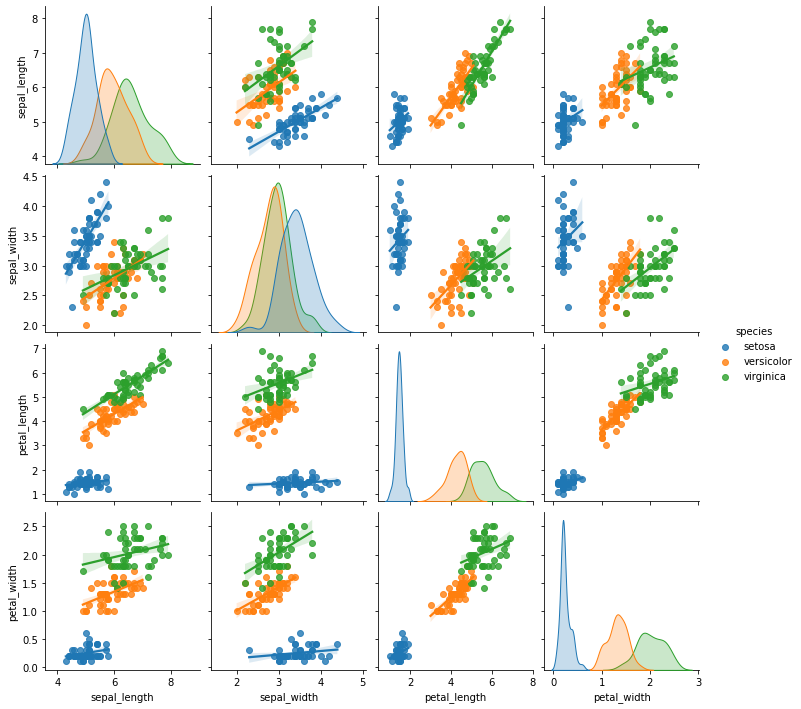

In [156]:
sns.pairplot(df, kind="reg", hue="species");

In [198]:
# Heat Map :
flights = sns.load_dataset("flights")
df=flights.copy()
df.head() 

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [199]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [200]:
flights.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [201]:
df["month"]

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

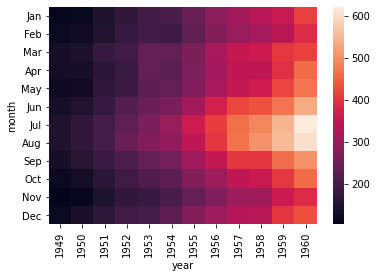

In [202]:
df = df.pivot("month","year","passengers");
sns.heatmap(df) 

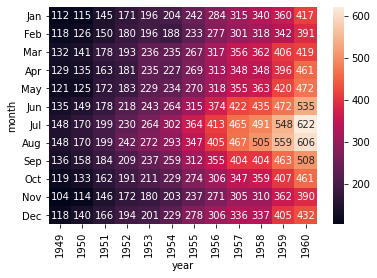

In [203]:
sns.heatmap(df, annot=True, fmt="d") 

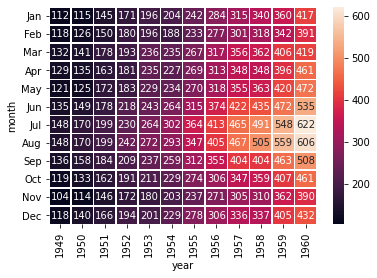

In [204]:
sns.heatmap(df, annot=True, fmt="d", linewidths=0.5) 

**Line Graphs**

In [205]:
fmri = sns.load_dataset("fmri")
df=fmri.copy()
df.head() 

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [206]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [207]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [208]:
df.groupby("timepoint")["signal"].count() # equal counting for each time point

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [209]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


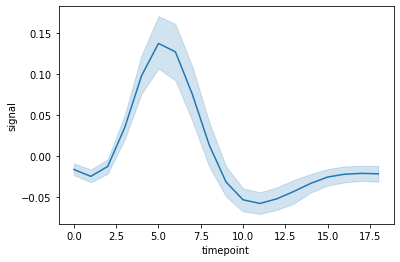

In [210]:
sns.lineplot(x="timepoint", y ="signal", data=df);

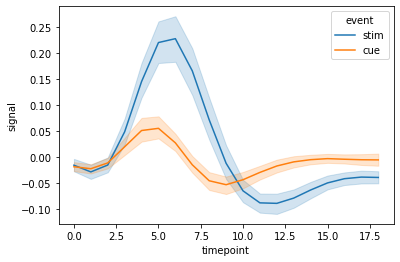

In [211]:
sns.lineplot(x="timepoint", y ="signal", hue="event", data=df);

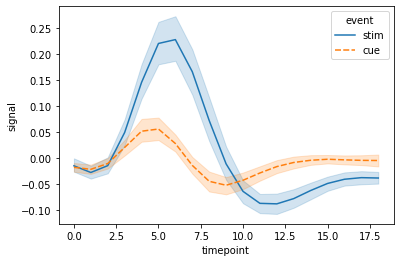

In [212]:
sns.lineplot(x="timepoint", y ="signal", hue="event",style="event",  data=df);

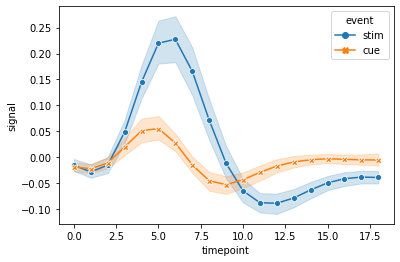

In [213]:
sns.lineplot(x="timepoint", 
             y ="signal",
             hue="event",
             style="event",  
             markers=True, dashes= False, data=df); # it will be show us dots of average value. 

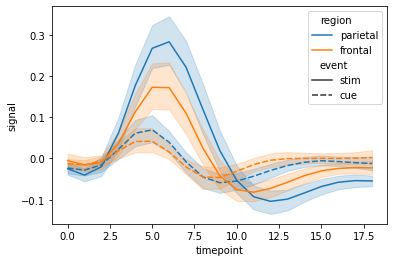

In [214]:
sns.lineplot(x="timepoint", 
             y ="signal",
             hue="region",
             style="event",  
              data=df);

**Basic Time Series Graph**

In [ ]:
pip install pandas_datareader

In [216]:
import pandas_datareader as pr

In [219]:
df = pr.get_data_yahoo("AAPL", start="2016-01-01" , end="2019-08-25" );
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154


In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,917.0,3.909541e+01,9.663354e+00,2.291750e+01,2.908250e+01,4.000000e+01,4.680000e+01,5.836750e+01
Low,917.0,3.842871e+01,9.454082e+00,2.236750e+01,2.868000e+01,3.918000e+01,4.595000e+01,5.744500e+01
Open,917.0,3.875030e+01,9.557526e+00,2.250000e+01,2.884500e+01,3.963250e+01,4.630750e+01,5.769500e+01
Close,917.0,3.877278e+01,9.552587e+00,2.258500e+01,2.895500e+01,3.948000e+01,4.637500e+01,5.801750e+01
Volume,917.0,1.299439e+08,5.898968e+07,4.544800e+07,9.097520e+07,1.135284e+08,1.503472e+08,5.334788e+08
Adj Close,917.0,3.728303e+01,9.710697e+00,2.113440e+01,2.729615e+01,3.812275e+01,4.500625e+01,5.638799e+01


In [222]:
closed = df["Close"]
closed.describe()

count    917.000000
mean      38.772784
std        9.552587
min       22.584999
25%       28.955000
50%       39.480000
75%       46.375000
max       58.017502
Name: Close, dtype: float64

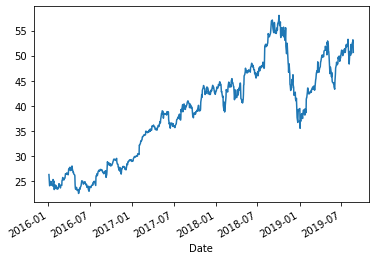

In [224]:
closed.plot();

In [227]:
closed.index = pd.DatetimeIndex(closed.index)
closed

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
                ...    
2019-08-19    52.587502
2019-08-20    52.590000
2019-08-21    53.160000
2019-08-22    53.115002
2019-08-23    50.660000
Name: Close, Length: 917, dtype: float64